In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Satellite_Image_Classification_Neil

data


Mounted at /content/drive
data
Found 4518 images belonging to 4 classes.
Found 1129 images belonging to 4 classes.

Class Index Mapping:
{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 896s 6s/step - accuracy: 0.5714 - loss: 0.8480 - val_accuracy: 0.8167 - val_loss: 0.4418
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.8416 - loss: 0.3717 - val_accuracy: 0.7724 - val_loss: 0.4118
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8308 - loss: 0.4037 - val_accuracy: 0.8733 - val_loss: 0.3225
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8607 - loss: 0.3299 - val_accuracy: 0.7777 - val_loss: 0.4371
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8645 - loss: 0.3317 - val_accuracy: 0.8902 - val_loss: 0.2466
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8709 - loss: 0.3114 - val_accuracy: 0.8477 - val_loss: 0.2802
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8847 - loss: 0.2787 - val_accuracy: 0.8787 - val_loss: 0.2322
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8846 - loss: 0.2566 - val_accu

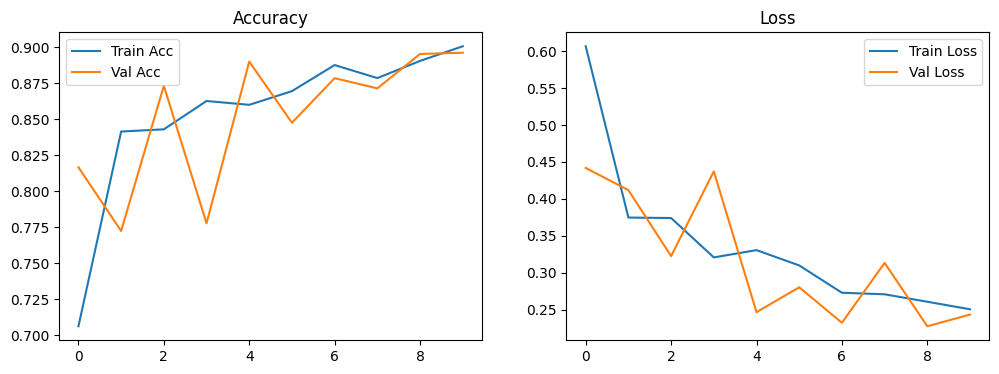

✅ Model saved successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Check your dataset folder
!ls /content/drive/MyDrive/Satellite_Image_Classification_Neil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Base path
base_path = "/content/drive/MyDrive/Satellite_Image_Classification_Neil/data"

# --- ImageDataGenerator for training and validation ---
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2,          # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

img_height, img_width = 128, 128  # You can increase to 224x224 if needed
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='sparse',    # because labels are numeric
    batch_size=batch_size,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=batch_size,
    subset='validation'
)

print("\nClass Index Mapping:")
print(train_generator.class_indices)

# --- Build CNN Model ---
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')   # 4 classes: cloudy, desert, green_area, water
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Train Model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# --- Evaluate ---
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# --- Plot Accuracy & Loss ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')

plt.show()

# --- Save model ---
model.save("/content/drive/MyDrive/Satellite_Image_Classification_Neil/satellite_cnn_model.h5")
print("✅ Model saved successfully!")
